In [347]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd


plt.style.use('dark_background')

In [348]:
iris = load_iris()

In [349]:
X = iris.data
X.shape

(150, 4)

In [350]:
y = iris.target
y.shape

(150,)

In [351]:
df = pd.DataFrame(y)
df.value_counts()

0    50
1    50
2    50
dtype: int64

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [353]:
# model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print(f'Weight of model:\n{log_model.coef_}\n')
print(f'Intercept: {log_model.intercept_}\n')
print(f'True values:\n{y_test}\n')
print(f'Predict values:\n{y_pred}\n')

Weight of model:
[[-0.40905864  0.84644076 -2.35991373 -1.02518991]
 [ 0.47550768 -0.30643072 -0.10203763 -0.9333696 ]
 [-0.06644904 -0.54001004  2.46195136  1.95855951]]

Intercept: [  9.46303624   1.98330197 -11.44633821]

True values:
[0 2 0 0 2 1 2 0 2 1 2 1 2 2 1 2 2 1 1 0 0 2 0 0 1 1 1 2 0 1]

Predict values:
[0 2 0 0 2 1 2 0 2 1 2 1 2 2 1 1 2 1 1 0 0 2 0 0 1 1 1 2 0 1]



C:\Users\grayni\anaconda3\envs\tr_py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [354]:
print(f'Accuracy: {np.sum(y_test == y_pred) / len(y_test)}')

Accuracy: 0.9666666666666667


#### PCA

In [355]:
def standard_scale(x):
    return (x - x.mean(axis=0)) / x.std(axis=0)

In [356]:
X2 = standard_scale(X)
X2

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

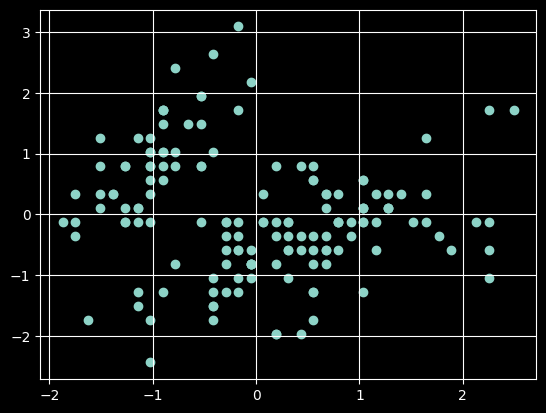

In [357]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.grid()
plt.show()

In [358]:
def covariance(x, y):
    return np.sum(x * y) / (len(x) - 1)

In [359]:
print(f'covariance 0: {covariance(X2[:, 0], X2[:, 0])}')
print(f'covariance 1: {covariance(X2[:, 1], X2[:, 1])}')
print(f'covariance 0 & 1: {covariance(X2[:, 0], X2[:, 1])}')

covariance 0: 1.0067114093959733
covariance 1: 1.0067114093959741
covariance 0 & 1: -0.11835884308691484


In [360]:
cov = np.cov(X2.T)
cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [361]:
covariance_matrix = X2.T @ X2

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('own values & own vectors in descending order:')

for i in eig_pairs:
    print(i)

own values & own vectors in descending order:
(437.77467247979865, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.1045707202106, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.013531335697223, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642929384, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [362]:
eig_sum = sum(eig_values)

percentage_eig = [pair / eig_sum * 100 for pair in sorted(eig_values, reverse=True)]
percentage_eig

[72.96244541329986, 22.850761786701792, 3.6689218892828745, 0.5178709107154903]

In [363]:
cum_var_exp = np.cumsum(percentage_eig)
cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [364]:
W = np.hstack([eig_pairs[i][1].reshape(4, 1) for i in range(2)])
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [365]:
Z = X2.dot(W)
Z[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

In [366]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=6)

In [367]:
log_model2 = LogisticRegression()
log_model2.fit(X_train, y_train)
y_pred2 = log_model2.predict(X_test)

print(f'Weight of model:\n{log_model2.coef_}\n')
print(f'Intercept: {log_model2.intercept_}\n')
print(f'True values:\n{y_test}\n')
print(f'Predict values:\n{y_pred2}\n')

Weight of model:
[[-2.76594992 -0.43888543]
 [-0.13346207  0.14361209]
 [ 2.89941199  0.29527334]]

Intercept: [-0.35249349  1.85329799 -1.5008045 ]

True values:
[0 2 0 0 2 1 2 0 2 1 2 1 2 2 1 2 2 1 1 0 0 2 0 0 1 1 1 2 0 1]

Predict values:
[0 2 0 0 2 1 2 0 2 1 1 1 2 2 1 2 2 1 1 0 0 2 0 0 1 2 2 2 0 1]



In [368]:
print(f'Accuracy: {np.sum(y_test == y_pred2) / len(y_test)}')

Accuracy: 0.9


#### Conclusion
Permissible loss in accuracy (use PCA). Dimension reduced by 2 times.